1. Defining the Question

a) Specifying the Question

What is a claim in the blue cars from provided Autolib Datasets?

b) Defining Metric of success

The main objective in this analysis is to understand Electric Car Usage in a car-sharing service company.



In order to meet the main objective the analysis will be able to test the following claim:

Null Hypothesis: The number of Blue Cars Taken is not different that of Blue Cars Returned

Alternative Hypothesis:The number of Blue Cars Taken is different that of Blue Cars Returned





c) Understanding the context

Just like before, we have been tasked to understand electric car usage by solving for another research question. We will work as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset. In an effort to do this, we need to identify some areas and periods of interest via sampling stating the reason to the choice of method, then perform hypothesis testing with regards to the claim that we will have made.

d) Recording the Experimental Design

Investigate a claim about the Blue Cars from the provided Autolib dataset

Define research question

Import Libraries

Read the data

Checking the data

Extenal Data source validation

Tidying the datasets

Exploratory Analysis

*   Univariate Analysis
*   Bivariate Analysis

*   Hypothesis Testing
*   Sampling

Implementing the solution

Challenging the solution

Follow up questions

Recommendation

e) Data Relevance


Data will be extracted from Autolib Dataset.

Links which assist to retrieve the data are [http://bit.ly/DSCoreAutolibDataset] and [Link] respectively.


2. Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

3. Read the data

In [200]:
#load the datasets from the source
url='/content/autolib_daily_events_postal_code.csv'

df = pd.read_csv('/content/autolib_daily_events_postal_code.csv', sep=',\s+', delimiter=',', encoding="utf-8", skipinitialspace=True)

#preview the dataset
df

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0


4. Checking the data

In [ ]:
#Determine the number of Records in our dataset
df.shape

(16085, 13)

In [ ]:
#Previewing the top of our dataset
#
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [ ]:
# Previewing the bottom of our dataset
df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [ ]:
#Checking whether each column has an appropriate datatype
df.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

5.External Data Source Validation

6.Tidying the datasets

In [243]:
#Rename the column names

df2=df.rename(columns = {'Postal code': 'POSTAL_CODE','date':'DATE','n_daily_data_points': 'DATA_POINTS' ,'dayOfWeek':'DAY', 'day_type':'DAY_TYPE','BlueCars_taken_sum':'BLUECARS_TAKEN', 'BlueCars_returned_sum':'BLUECARS_RETURNED', 'Utilib_taken_sum':'UTILIB_TAKEN','Utilib_returned_sum':'UTILIB_RETURNED','Utilib_14_taken_sum':'UTILIB1.4_TAKEN','Utilib_14_returned_sum':'UTILIB1.4_RETURNED','Slots_freed_sum':'SLOTS_FREED','Slots_taken_sum':'SLOTS_TAKEN'},inplace = False)

#Preview the dataset columns
df2.columns

Index(['POSTAL_CODE', 'DATE', 'DATA_POINTS', 'DAY', 'DAY_TYPE',
       'BLUECARS_TAKEN', 'BLUECARS_RETURNED', 'UTILIB_TAKEN',
       'UTILIB_RETURNED', 'UTILIB1.4_TAKEN', 'UTILIB1.4_RETURNED',
       'SLOTS_FREED', 'SLOTS_TAKEN'],
      dtype='object')

In [208]:
#convert column to datetime

df2['DATE'] = pd.to_datetime(df2['DATE'])

#preview date column
df2['DATE'] 

0       2018-01-01
1       2018-01-02
2       2018-01-03
3       2018-01-04
4       2018-01-05
           ...    
16080   2018-06-15
16081   2018-06-16
16082   2018-06-17
16083   2018-06-18
16084   2018-06-19
Name: DATE, Length: 16085, dtype: datetime64[ns]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

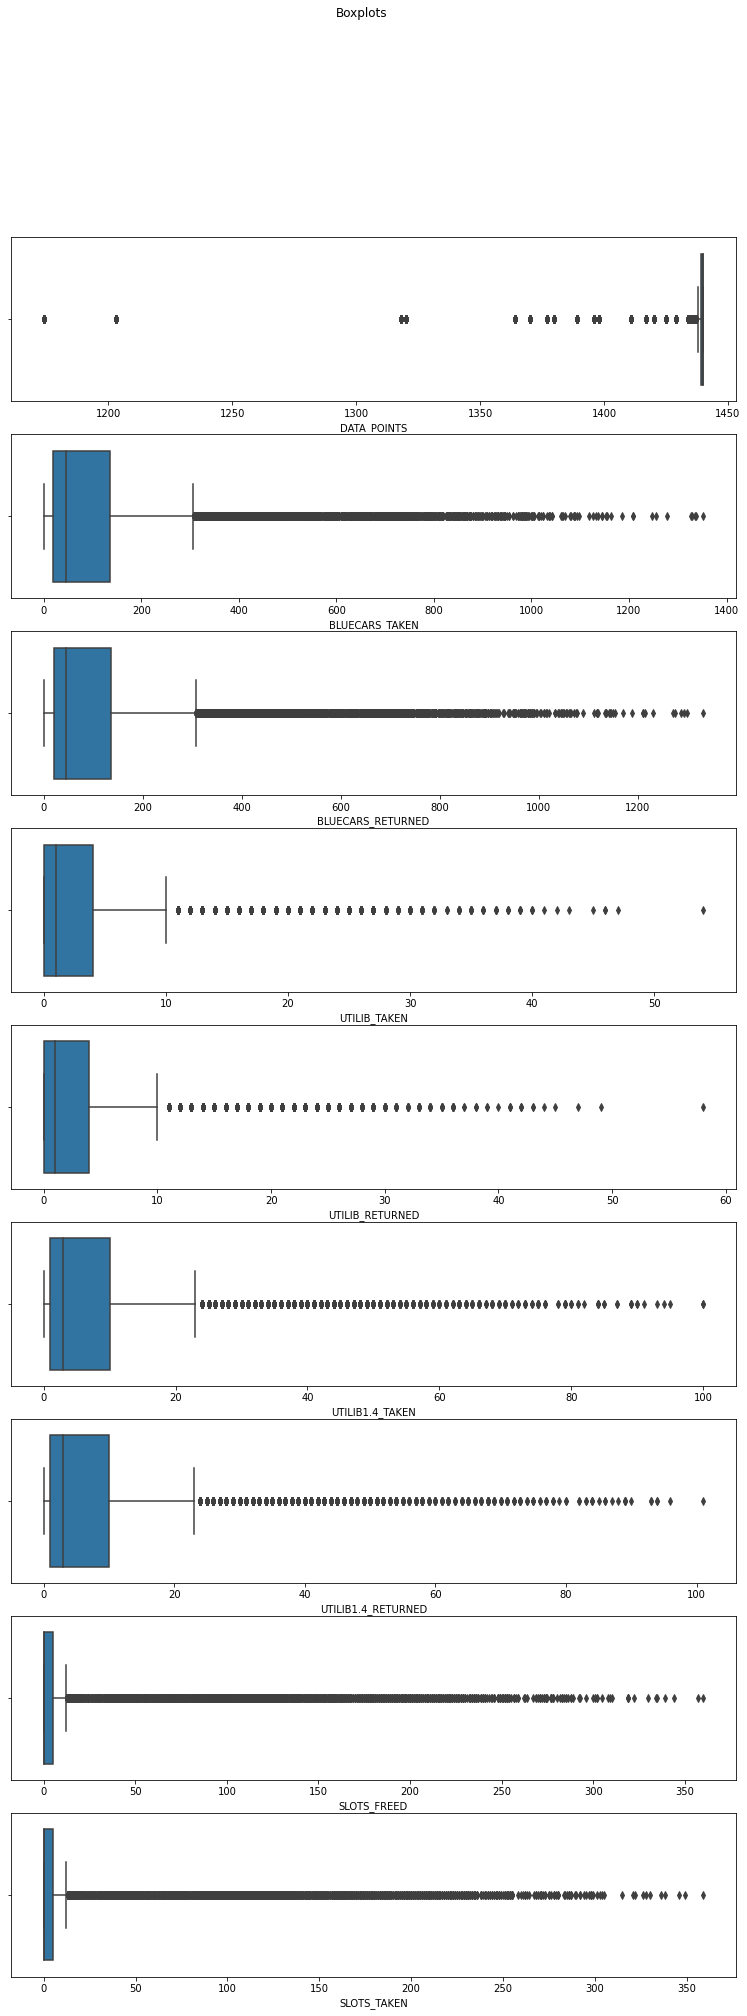

In [ ]:
#check for outliers 
fig, (ax1, ax2, ax3,ax4,ax5,ax6,ax7,ax8,ax9)= plt.subplots(9, figsize=(13,32))
fig.suptitle('Boxplots')
sns.boxplot(df2['DATA_POINTS'], ax=ax1)
sns.boxplot(df2['BLUECARS_TAKEN'], ax=ax2)
sns.boxplot(df2['BLUECARS_RETURNED'], ax=ax3)
sns.boxplot(df2['UTILIB_TAKEN'], ax=ax4)
sns.boxplot(df2['UTILIB_RETURNED'], ax=ax5)
sns.boxplot(df2['UTILIB1.4_TAKEN'], ax=ax6)
sns.boxplot(df2['UTILIB1.4_RETURNED'], ax=ax7)
sns.boxplot(df2['SLOTS_FREED'], ax=ax8)
sns.boxplot(df2['SLOTS_TAKEN'], ax=ax9)
plt.show()

In [244]:
#checking for anomalies

#Checking outliers

# quantiles
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range 
# 
df2 = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
# 
print(df2.shape)

# Printing the shape of our old dataset
#
print(df.shape)

(9783, 13)
(16085, 13)


In [190]:
#check for duplicates
df2.duplicated().sum()

0

In [ ]:
# Check for unique values in each column
for col in df2.columns.to_list():
  print(f'{col} column unique values: \n')
  print(df2[col].unique(), end='\n')
  print('**********')
  print('\n')

POSTAL_CODE column unique values: 

[75001 75002 75003 75004 75005 75006 75007 75008 75009 75010 75011 75012
 75013 75014 75015 75016 75017 75018 75019 75020 75112 75116 78000 78140
 78150 91330 91370 91400 92000 92100 92110 92120 92130 92140 92150 92160
 92170 92190 92200 92210 92220 92230 92240 92250 92260 92270 92290 92300
 92310 92320 92330 92340 92350 92360 92370 92380 92390 92400 92410 92420
 92500 92600 92700 92800 93100 93110 93130 93150 93170 93200 93230 93260
 93300 93310 93350 93360 93370 93390 93400 93440 93500 93600 93700 93800
 94000 94100 94110 94120 94130 94140 94150 94160 94220 94230 94300 94340
 94410 94450 94500 94700 94800 95100 95870 95880]
**********


DATE column unique values: 

['2018-01-01T00:00:00.000000000' '2018-01-02T00:00:00.000000000'
 '2018-01-03T00:00:00.000000000' '2018-01-04T00:00:00.000000000'
 '2018-01-05T00:00:00.000000000' '2018-01-06T00:00:00.000000000'
 '2018-01-07T00:00:00.000000000' '2018-01-08T00:00:00.000000000'
 '2018-01-09T00:00:00.000000

In [ ]:
#Identifying the Missing Data
df2.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [199]:
# More data cleaning procedures
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9783 entries, 3899 to 16083
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             9783 non-null   int64 
 1   date                    9783 non-null   object
 2   n_daily_data_points     9783 non-null   int64 
 3   dayOfWeek               9783 non-null   int64 
 4   day_type                9783 non-null   object
 5   BlueCars_taken_sum      9783 non-null   int64 
 6   BlueCars_returned_sum   9783 non-null   int64 
 7   Utilib_taken_sum        9783 non-null   int64 
 8   Utilib_returned_sum     9783 non-null   int64 
 9   Utilib_14_taken_sum     9783 non-null   int64 
 10  Utilib_14_returned_sum  9783 non-null   int64 
 11  Slots_freed_sum         9783 non-null   int64 
 12  Slots_taken_sum         9783 non-null   int64 
dtypes: int64(11), object(2)
memory usage: 1.0+ MB


In [245]:
#Drop unnecessary columns
df2.drop(['date', 'n_daily_data_points', 'Utilib_taken_sum', 'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum','Slots_freed_sum', 'Slots_taken_sum'], axis=1, inplace=True)

#preview the columns
df2.columns

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Index(['Postal code', 'dayOfWeek', 'day_type', 'BlueCars_taken_sum',
       'BlueCars_returned_sum'],
      dtype='object')

In [246]:
#convert column names to uppercase
df2.columns = df2.columns.str.upper()

#preview the columns
df2.columns

Index(['POSTAL CODE', 'DAYOFWEEK', 'DAY_TYPE', 'BLUECARS_TAKEN_SUM',
       'BLUECARS_RETURNED_SUM'],
      dtype='object')

7. Exploratory Analysis

In [ ]:
#Now we will confirm how many Weekday and Weekends are there in our dataset

#Frequency Distribution for categorical variables
cat_df = df2.select_dtypes(include='object').columns.to_list()
for col in cat_df:
  print(f'Column: {col}')
  print(df2[col].value_counts().sort_values(ascending=False))
  print('**********')
  print('\n')

Column: DAY_TYPE
weekday    11544
weekend     4541
Name: DAY_TYPE, dtype: int64
**********




Now that we have confirmed that our popluation follows the correct proportion, we are going to first create a random sample of 1000 days without stratification just to see how it behaves.

In [ ]:
# We pass in an argument called frac which symbolises the fraction of the population we want to use as our sample

# Non stratified sample
non_strat_output = df2.sample(frac=0.1) 

# check the proportion of the non_stratified sample
print(non_strat_output['DAY_TYPE'].value_counts())

weekday    1163
weekend     445
Name: DAY_TYPE, dtype: int64


In [ ]:
#To create a stratified random sample we'll use pandas groupBy method. Basically what the method does is that it splits our dataset into sets and then applies a function on each subset.
# In our case, we are going to applies a function that puts each subset into a random sample with a size of 100. The beauty about this method is that it strictly maintains the populations proportion.

# Stratified sample
df_strat = df2.groupby('DAY_TYPE', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))

# proportion of the non_stratified sample
print(df_strat['DAY_TYPE'].value_counts())

# Check the stratified output
print(df_strat)

weekday    1154
weekend     454
Name: DAY_TYPE, dtype: int64
       POSTAL_CODE  DAY DAY_TYPE  BLUECARS_TAKEN  BLUECARS_RETURNED
7652         92320    4  weekday              69                 61
7005         92260    4  weekday              30                 28
2903         75019    0  weekday             401                422
10406        93130    1  weekday              20                 26
7671         92320    2  weekday              68                 65
...            ...  ...      ...             ...                ...
1458         75010    5  weekend              56                 35
13728        94130    5  weekend              67                 60
5551         92160    6  weekend              51                 43
7474         92300    5  weekend             227                229
1009         75007    6  weekend             324                316

[1608 rows x 5 columns]


In [ ]:
#Extract day type data
df_day = df_strat[df_strat.DAY_TYPE== 'weekday']

#preview day type
df_day

,POSTAL_CODE,DAY,DAY_TYPE,BLUECARS_TAKEN,BLUECARS_RETURNED
7652,92320,4,weekday,69,61
7005,92260,4,weekday,30,28
2903,75019,0,weekday,401,422
10406,93130,1,weekday,20,26
7671,92320,2,weekday,68,65
...,...,...,...,...,...
10721,93170,2,weekday,34,35
15989,95880,0,weekday,19,23
11092,93260,1,weekday,33,31
11334,93300,1,weekday,2,0



Since Selection requires one set of data either Weekday or Weekend.We choosed to work with Weekdays.
This is because a weekday has more days hence we get a large sample to draw insight from.

In [ ]:
#preview a sample of 10 
df_day.sample(10)

,POSTAL_CODE,DAY,DAY_TYPE,BLUECARS_TAKEN,BLUECARS_RETURNED
15407,94700,0,weekday,25,21
1786,75012,3,weekday,437,447
10897,93230,1,weekday,43,49
15837,95870,4,weekday,19,19
11116,93260,4,weekday,45,38
10218,93110,0,weekday,26,25
5645,92170,4,weekday,72,63
13615,94130,4,weekday,55,53
6747,92250,0,weekday,43,41
7509,92310,3,weekday,54,52


In [ ]:
#preview the new shape of the selected day type
df_day.shape

(1154, 13)

In [ ]:
#check for unique values
df_day.nunique()

POSTAL_CODE          104
DAY                    5
DAY_TYPE               1
BLUECARS_TAKEN       347
BLUECARS_RETURNED    327
dtype: int64

a. Univariate Analysis

In [172]:
#get proprotion of day of week
df_day['DAY'].value_counts(normalize=True)*100

2    21.317158
4    20.883882
0    20.883882
1    19.410745
3    17.504333
Name: DAY, dtype: float64

From the dataset, the days of the week are coded as following:
0 represents monday, 1 represents Tuesday, 2 represents Wednesday, 3 represents Thursday and 4 represents Friday


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'TRAFFIC PER DAY')

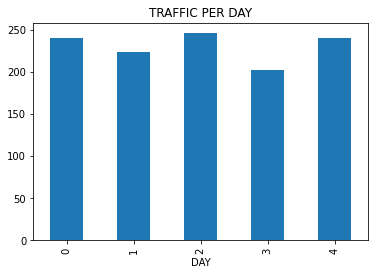

In [ ]:
#How is traffic per day?

#initially, set that counter to 1.
df_day['COUNTER'] =1
group_data = df_day.groupby(['DAY',])['COUNTER'].sum().plot.bar()
plt.title('TRAFFIC PER DAY')

In [ ]:

# Describe numerical variables 
df_day[['BLUECARS_TAKEN','BLUECARS_RETURNED']].describe()

,BLUECARS_TAKEN,BLUECARS_RETURNED
count,1154.000000,1154.000000
mean,122.167244,121.651646
std,177.750580,176.472381
min,0.000000,0.000000
25%,20.000000,20.000000
50%,44.000000,44.000000
75%,128.500000,129.250000
max,932.000000,970.000000


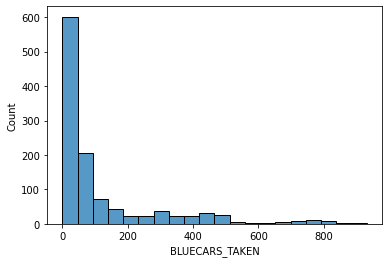

In [ ]:
sns.histplot(df_day['BLUECARS_TAKEN'], bins=20)

In [ ]:
#check for skewness in Bluecars taken column
df2['BLUECARS_TAKEN'].skew()

2.4063548974959086

The BLUECARS_TAKEN variable is positively skewed

In [ ]:
#check for kurtosis in column for age
df_day['BLUECARS_TAKEN'].kurt()

4.651522070259686

In [ ]:
#Check for nomality test using Shapiro-Wilk test

#imporing the shapiro function
from scipy.stats import shapiro 

# generating univariate observations
data = df_day['BLUECARS_TAKEN']

# testing for normality
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')
  

Statistics=0.666, p=0.000
Sample does not look Gaussian


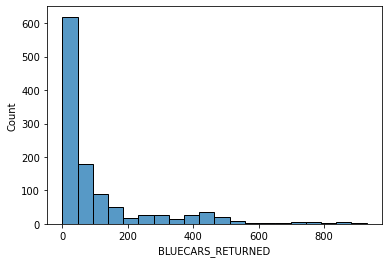

In [ ]:
sns.histplot(df_day['BLUECARS_RETURNED'], bins=20)

In [ ]:
#check for skewness in Bluecars returned column
df_day['BLUECARS_RETURNED'].skew()

2.2185017476361586

The BLUECARS_RETURNED variable is positively skewed

In [ ]:
#check for kurtosis in column for age
df_day['BLUECARS_RETURNED'].kurt()

4.738303746534191

In [ ]:
#Check for nomality test using Shapiro-Wilk test
# imporing the shapiro function
from scipy.stats import shapiro 

# generating univariate observations
data2 = df_day['BLUECARS_RETURNED']

# testing for normality
stat, p = shapiro(data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

Statistics=0.666, p=0.000
Sample does not look Gaussian


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


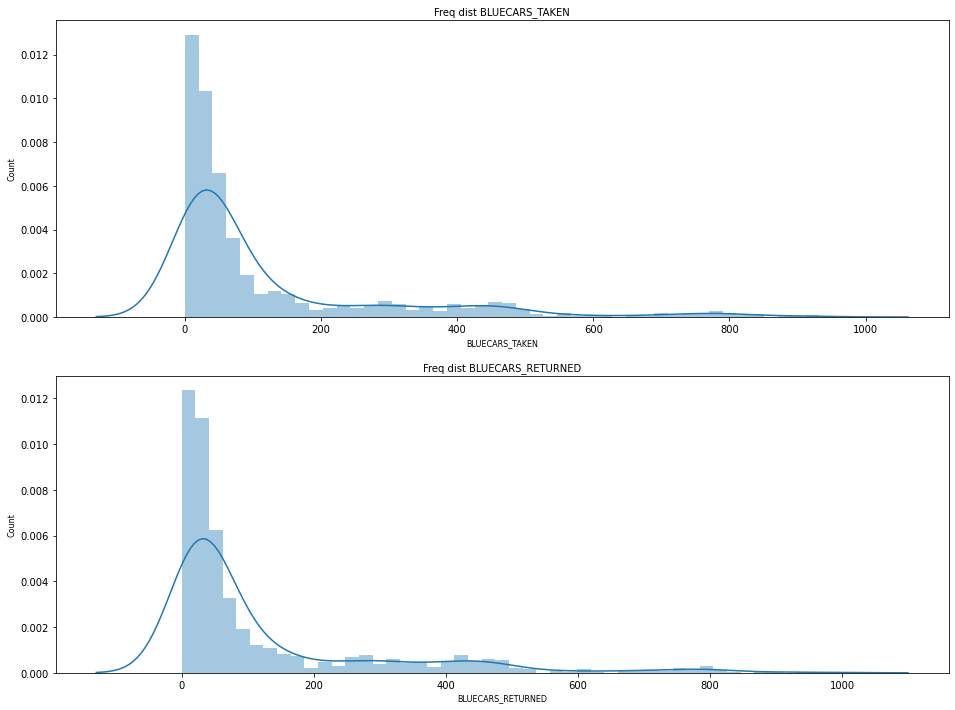

In [ ]:
#univariate distribution of the numerical columns 
col_names = ['BLUECARS_TAKEN','BLUECARS_RETURNED']

fig, ax = plt.subplots(len(col_names), figsize=(16,12))
for i, col_val in enumerate(col_names):

    sns.distplot(df_day[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

We can see that both BLUECARS_TAKEN and BLUECARS_RETURNED column are skewed to the right which indicates that most of the values lie in the upper range.

b. Bivariate Analysis

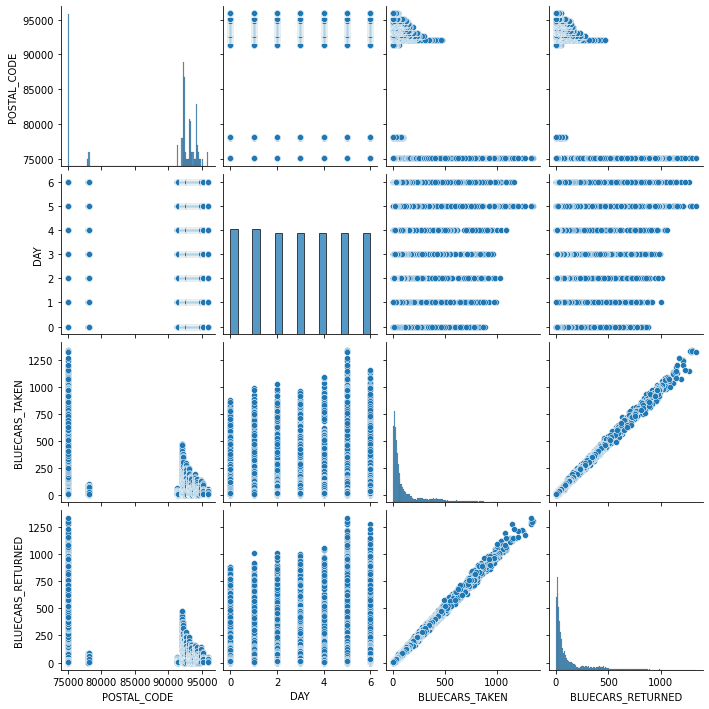

In [ ]:
# Ploting the bivariate summaries and recording our observations
sns.pairplot(df2)
plt.show()

<Figure size 864x720 with 0 Axes>

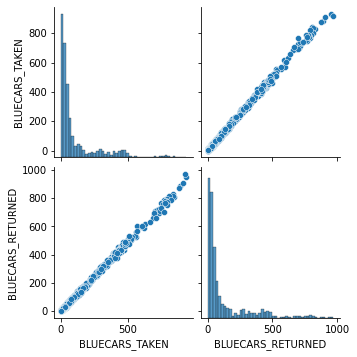

In [ ]:
# Determine correlation between numeric features i.e BLUECARS_TAKEN and BLUECARS_RETURNED

plt.figure(figsize=(12,10))
sns.pairplot(df_day[['BLUECARS_TAKEN', 'BLUECARS_RETURNED']])

In [ ]:
#what is correlation between BLUECARS_TAKEN and BLUECARS_RETURNED
df_day['BLUECARS_TAKEN'].corr(df2['BLUECARS_RETURNED'])

0.9990411463006597

From the scatter plot and pearsons correlation, there is very strong positive correlation between BLUECARS_TAKEN and BLUECARS_RETURNED

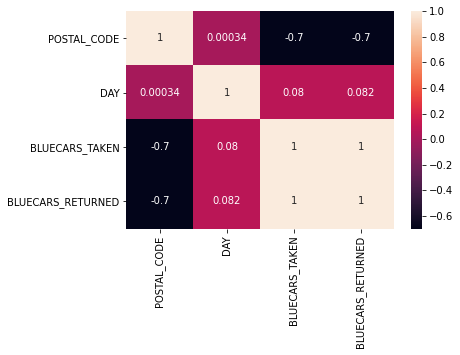

In [ ]:
sns.heatmap(df2.corr(),annot=True)
plt.show()

7. Implementing the solution

a. Hypothesis Testing

Null Hypothesis: The number of Blue Cars Taken is not different that of Blue Cars Returned

Alternative Hypothesis:The number of Blue Cars Taken is different that of Blue Cars Returned

In [247]:
#preview the columns
df2

,POSTAL CODE,DAYOFWEEK,DAY_TYPE,BLUECARS_TAKEN_SUM,BLUECARS_RETURNED_SUM
3899,91330,0,weekday,19,9
3900,91330,1,weekday,10,10
3901,91330,2,weekday,11,13
3903,91330,4,weekday,10,6
3905,91330,6,weekend,28,17
...,...,...,...,...,...
16079,95880,3,weekday,15,13
16080,95880,4,weekday,15,10
16081,95880,5,weekend,19,19
16082,95880,6,weekend,33,35


In [216]:
#check the datatypes
df2.dtypes

POSTAL CODE               int64
DAYOFWEEK                 int64
DAY_TYPE                 object
BLUECARS_TAKEN_SUM        int64
BLUECARS_RETURNED_SUM     int64
dtype: object

In [269]:
#Drop day type column

df2.drop(['DAY_TYPE'], axis=1, inplace=True)
df2

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,POSTAL CODE,DAYOFWEEK,BLUECARS_TAKEN_SUM,BLUECARS_RETURNED_SUM
3899,91330,0,19,9
3900,91330,1,10,10
3901,91330,2,11,13
3903,91330,4,10,6
3905,91330,6,28,17
...,...,...,...,...
16079,95880,3,15,13
16080,95880,4,15,10
16081,95880,5,19,19
16082,95880,6,33,35


In [270]:
# visualization styling code
sns.set(rc={'figure.figsize':(13, 7.5)})
sns.set_context('talk')

In [271]:
#Turning off warnings
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [272]:
df2.count()

POSTAL CODE              9783
DAYOFWEEK                9783
BLUECARS_TAKEN_SUM       9783
BLUECARS_RETURNED_SUM    9783
dtype: int64

In [273]:
# Normality test 

from scipy.stats import shapiro

def shapiro_test(df2, col_list):
    for x in col_list:
        print(x)
        data = df2[x]
        stat, p = shapiro(data)
        print('Statistics=%.3f, p=%.3f' % (stat, p))
        # interpret
        alpha = 0.05
        if p > alpha:
            print('Sample looks Gaussian (fail to reject H0)')
        else:
            print('Sample does not look Gaussian (reject H0)')
        print('\n')

In [274]:
# shapiro Wilk's test
shapiro_test(df2, list(df2.columns))

POSTAL CODE
Statistics=0.926, p=0.000
Sample does not look Gaussian (reject H0)


DAYOFWEEK
Statistics=0.905, p=0.000
Sample does not look Gaussian (reject H0)


BLUECARS_TAKEN_SUM
Statistics=0.825, p=0.000
Sample does not look Gaussian (reject H0)


BLUECARS_RETURNED_SUM
Statistics=0.823, p=0.000
Sample does not look Gaussian (reject H0)




/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning:

p-value may not be accurate for N > 5000.



In [306]:
#Import right libraries

import scipy.stats as stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

#Call required libraries

# To time processes
import time 

#To suppress warnings
import warnings

#Data manipulation         
import numpy as np           
import pandas as pd

#For graphics     
import matplotlib.pyplot as plt             
%matplotlib inline
import seaborn as sns
sns.set()
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# For scaling dataset
from sklearn.preprocessing import StandardScaler

#For clustering
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation 

#For GMM clustering
from sklearn.mixture import GaussianMixture

# For os related operations
import os                    
import sys

Stratified Sampling

In [276]:
# Stratified sample
df3 = df2.groupby('DAYOFWEEK', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))
df3

,POSTAL CODE,DAYOFWEEK,BLUECARS_TAKEN_SUM,BLUECARS_RETURNED_SUM
4928,92120,0,72,74
4358,91400,0,4,5
4285,91400,0,7,8
10889,93230,0,25,25
6384,92220,0,56,57
...,...,...,...,...
15281,94500,6,46,36
7468,92300,6,170,176
7014,92260,6,36,27
13298,94110,6,34,38


In [277]:
#population mean of Blue cars taken
a = df['BlueCars_taken_sum'].mean()
a

125.92695057506994

In [278]:
#population mean of bluecars returned
b= df['BlueCars_returned_sum'].mean()
b

125.912713708424

In [279]:
#sample mean of bluecars taken
c = df3['BLUECARS_TAKEN_SUM'].mean()
c

48.94779938587513

In [280]:
#sample mean of bluecars returned
d = df3['BLUECARS_RETURNED_SUM'].mean()
d

48.922210849539404

In [281]:
# sample standard deviation taken
e = df3['BLUECARS_TAKEN_SUM'].std()
e

45.84860530451868

In [282]:
#sample standard deviation of blue cars returned
f = df3['BLUECARS_RETURNED_SUM'].std()
f

45.62833288999554

In [283]:
# calculating the z-score
zscore = (b-a) / e
zscore

-0.0003105190779825437

In [284]:
#calculating the p value
from scipy.stats import norm
p = stats.norm.cdf(zscore)
p

0.4998761208129123

In [285]:
#interpretation of the p value

# alpha value is 0.05 or 5%

if p < 0.05:   
   print(" we are rejecting null hypothesis")
else:
  print("we fail to reject null hypothesis")

we fail to reject null hypothesis


In [286]:
# point estimation

# population.mean() - sample.mean()

# we will use the mean for the blue cars that were taken
 
df['BlueCars_taken_sum'].mean() - df3['BLUECARS_RETURNED_SUM'].mean()

77.00473972553053

In [287]:

import math
sample_mean = df3['BLUECARS_RETURNED_SUM'].mean()

# Get the z-critical value
z_critical = stats.norm.ppf(q = 0.975)

# Check the z-critical value
print("z-critical value:")              
print(z_critical)

# Get the population standard deviation
pop_stdev = df['BlueCars_taken_sum'].std() 

margin_of_error = z_critical * (pop_stdev/math.sqrt(296))

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

z-critical value:
1.959963984540054
Confidence interval:
(27.798305110196864, 70.04611658888194)


Clustering Sampling

<function matplotlib.pyplot.show>

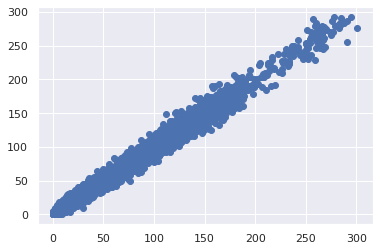

In [288]:
# cluster sampling
plt.scatter(df2['BLUECARS_RETURNED_SUM'],df2['BLUECARS_TAKEN_SUM'])
plt.show

In [289]:
#preview column for bluecars taken and blue cars returned
x= df2.iloc[:, 2:4]
x

,BLUECARS_TAKEN_SUM,BLUECARS_RETURNED_SUM
3899,19,9
3900,10,10
3901,11,13
3903,10,6
3905,28,17
...,...,...
16079,15,13
16080,15,10
16081,19,19
16082,33,35


In [290]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [291]:

identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [292]:
kmeans.cluster_centers_

array([[ 29.41817236,  29.40023398],
       [122.21483254, 122.184689  ]])

In [293]:
kmeans.inertia_

13572281.669321518

In [294]:
# Create a copy of the data
df3 = df2.copy()

# Create a new Series, containing the identified cluster for each observation
df3['Cluster'] = identified_clusters

# Check the result
df3

,POSTAL CODE,DAYOFWEEK,BLUECARS_TAKEN_SUM,BLUECARS_RETURNED_SUM,Cluster
3899,91330,0,19,9,0
3900,91330,1,10,10,0
3901,91330,2,11,13,0
3903,91330,4,10,6,0
3905,91330,6,28,17,0
...,...,...,...,...,...
16079,95880,3,15,13,0
16080,95880,4,15,10,0
16081,95880,5,19,19,0
16082,95880,6,33,35,0


In [295]:
#Scaling of data
ss = StandardScaler()
ss.fit_transform(df3)

array([[-1.7533916 , -1.43600185, -0.6531736 , -0.87020858, -0.52122505],
       [-1.7533916 , -0.95403375, -0.84755205, -0.84857362, -0.52122505],
       [-1.7533916 , -0.47206566, -0.82595445, -0.78366872, -0.52122505],
       ...,
       [ 2.74183785,  0.97383864, -0.6531736 , -0.65385893, -0.52122505],
       [ 2.74183785,  1.45580674, -0.35080711, -0.30769949, -0.52122505],
       [ 2.74183785, -1.43600185, -0.82595445, -0.76203376, -0.52122505]])

In [ ]:

def doGMM(X, nclust=2):
    model = GaussianMixture(n_components=nclust,init_params='kmeans')
    model.fit(X)
    clust_labels3 = model.predict(X)
    return (clust_labels3)

clust_labels3 = doGMM(df3,2)
gmm = pd.DataFrame(clust_labels3)
df3.insert((df3.shape[1]),'gmm',gmm)

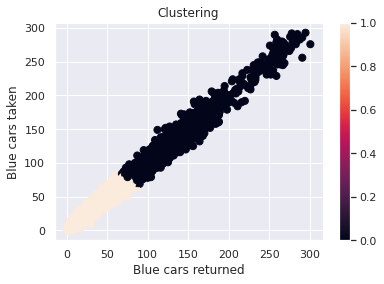

In [303]:
#Plotting the cluster obtained using GMM

fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df3['BLUECARS_RETURNED_SUM'],df3['BLUECARS_TAKEN_SUM'],c=gmm[0],s=50)
ax.set_title('Clustering')
ax.set_xlabel('Blue cars returned')
ax.set_ylabel('Blue cars taken')
plt.colorbar(scatter)

*Conclusion*

We fail to reject the null hypothesis becase there is no sufficient evidence to prove that the average means of the BLUE CARS TAKEN and BLUE CARS RETURNED are not equal.

7.Challenging the solution

Based on the Analysis more evidence is required so as to accept the claim

9. Follow up questions

At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.


a). Did we have the right data?

b). Do we need other data to answer our question?

c). Did we have the right question?

9. Recommendation

At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.
